In [2]:
import time
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import math
plt.rcParams['figure.figsize'] = [16, 14]

In [3]:
def show(img):
    if len(img.shape) <= 2:
        print('Using gray cmap')
        plt.imshow(img, cmap='gray')
    else:
        print("Color image")
        plt.imshow(img)

def showbgr(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

def grid_show(imgs, rows, cols, labels = None):
    f, ax = plt.subplots(rows, cols)
    i = 0
    try:
        for y in range(rows):
            for x in range(cols):
                if len(imgs[i].shape) <= 2:
                    ax[y][x].imshow(imgs[i], cmap='gray')
                else:
                    ax[y][x].imshow(cv.cvtColor(imgs[i], cv.COLOR_BGR2RGB))
                if labels:
                    ax[y][x].set_title(labels[i])
                i += 1
    except:
        pass

# Basics of Computer Vision
From Wikipedia:

*Computer vision is an interdisciplinary scientific field that deals with how computers can gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to understand and automate tasks that the human visual system can do.*

1. Wide Field
2. Generally trying to recognize object, localize them, provide understanding
3. Image filtering
4. Color space conversion
5. Motion tracking
6. Shape identification
7. Histogram generation 

# What is an Image
A digital image, typically, consists of a series of 8-bit numbers with a specific width and height and three color channels: red, green, and blue

Image loaded


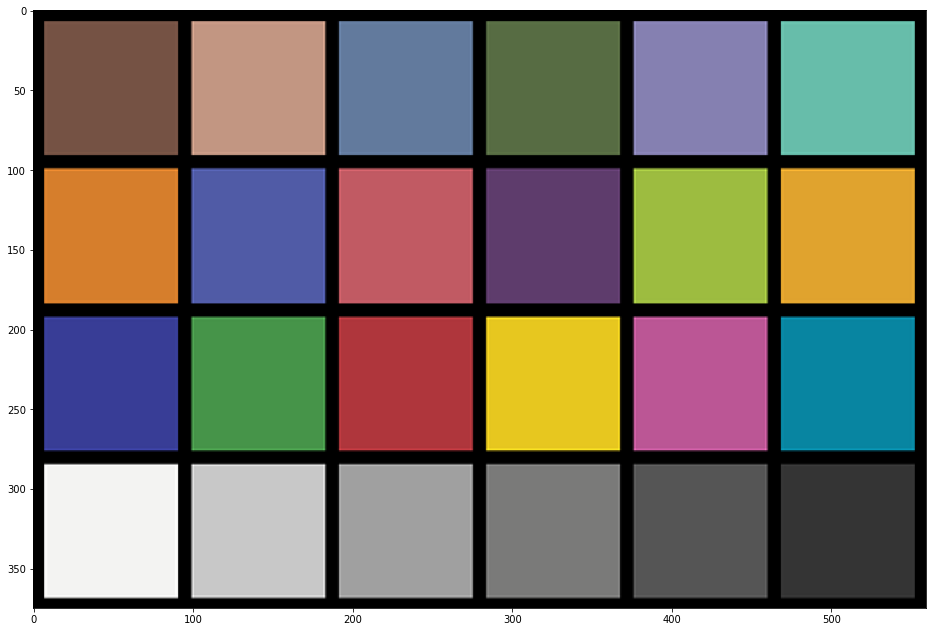

In [22]:
mcbeth = cv.imread('mcbeth.png')
if mcbeth is not None:
    print('Image loaded')
showbgr(mcbeth)

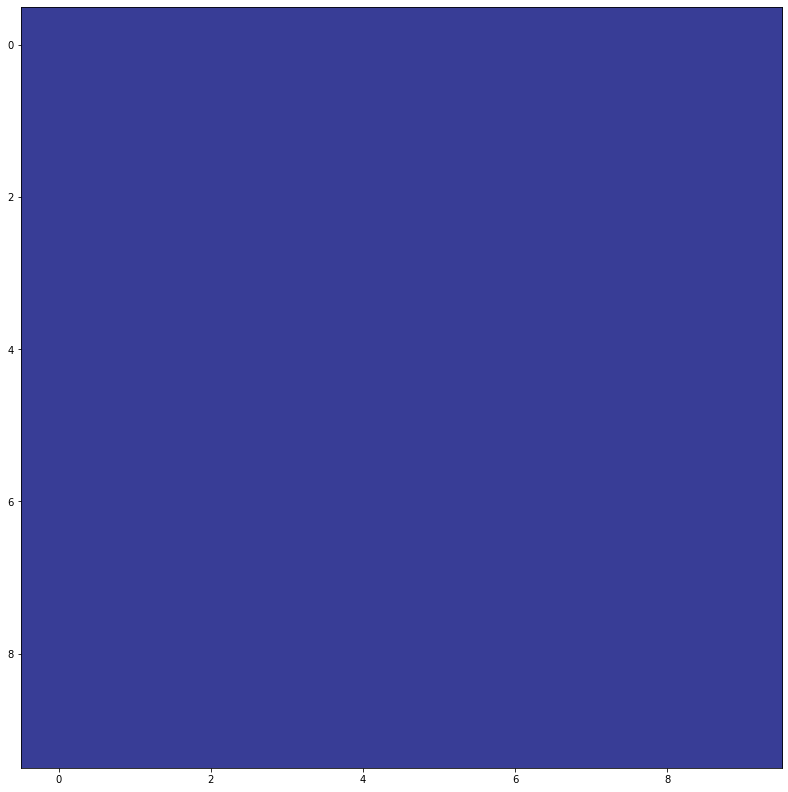

In [5]:
patch = mcbeth[200:210, 20:30,:]
showbgr(patch)

In [6]:
patch

array([[[150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56]],

       [[150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56]],

       [[150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56]],

       [[150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61,  56],
        [150,  61, 

# Histograms
Histograms are collected counts of data organized into a set of predefined bins


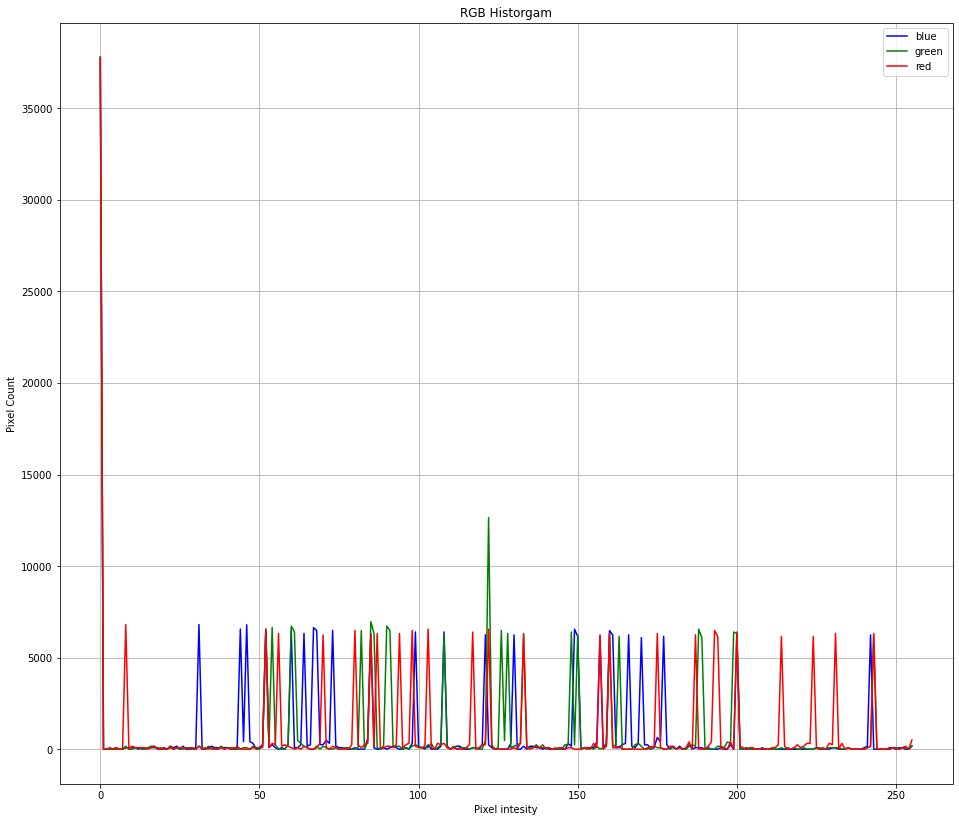

In [23]:
bgr_planes = cv.split(mcbeth)
blueh  = cv.calcHist(bgr_planes, [0], None, [256], (0, 256))
greenh = cv.calcHist(bgr_planes, [1], None, [256], (0, 256))
redh   = cv.calcHist(bgr_planes, [2], None, [256], (0, 256))
plt.plot(blueh, label='blue', color='b')
plt.plot(greenh, label='green', color='g')
plt.plot(redh, label='red', color='r')
plt.xlabel('Pixel intesity')
plt.ylabel('Pixel Count')
plt.title('RGB Historgam')
plt.legend()
plt.grid()


# Color Space Conversion
You can look at images in many different color spaces. RGB is the most common, but from an image processor perspective, it is one of the worst. 

HSL or HSV is a better way of looking at colors. This is because it splits the colors into Hue, Saturation, and Value (or lightness). This allows you to select a color and ignore the saturation and lightness of the color. 

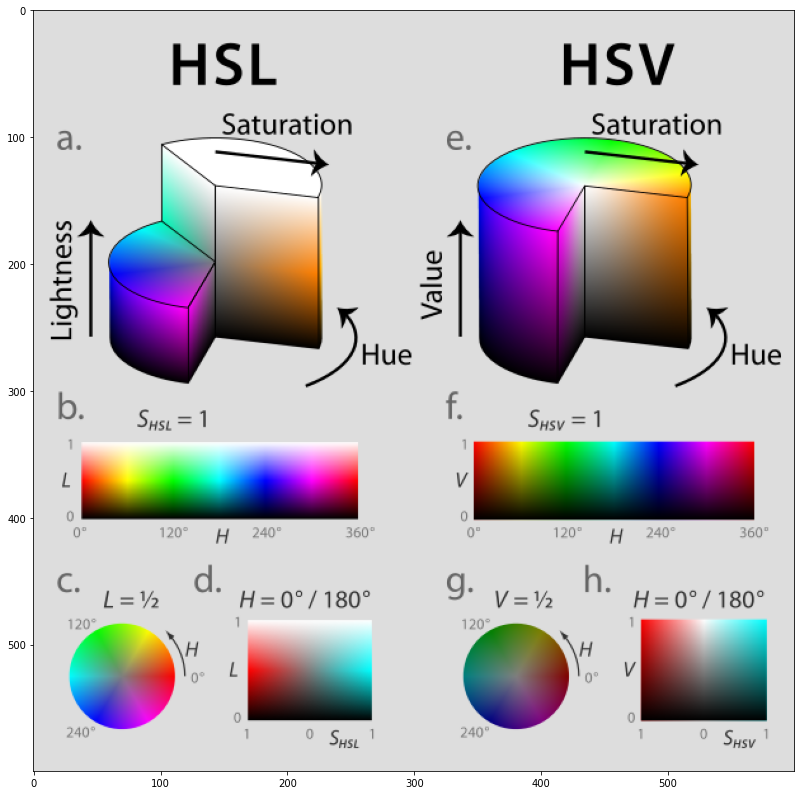

In [ ]:
hsv = cv.imread('600px-Hsl-hsv_models.svg.png')
showbgr(hsv)

Using gray cmap


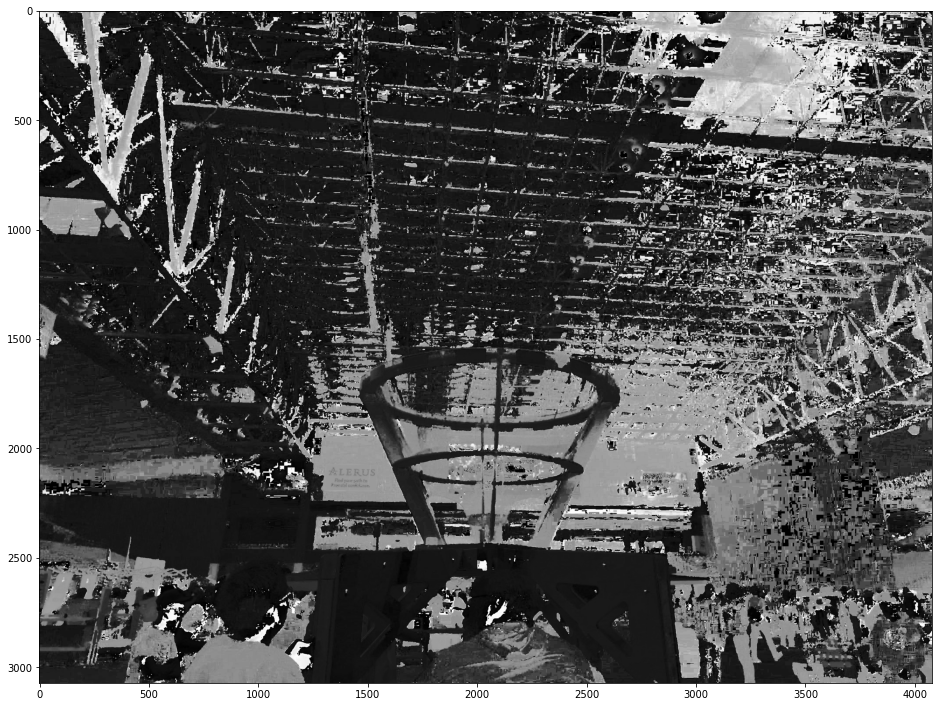

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV_FULL)
show(hsv[:,:,0])

Using gray cmap


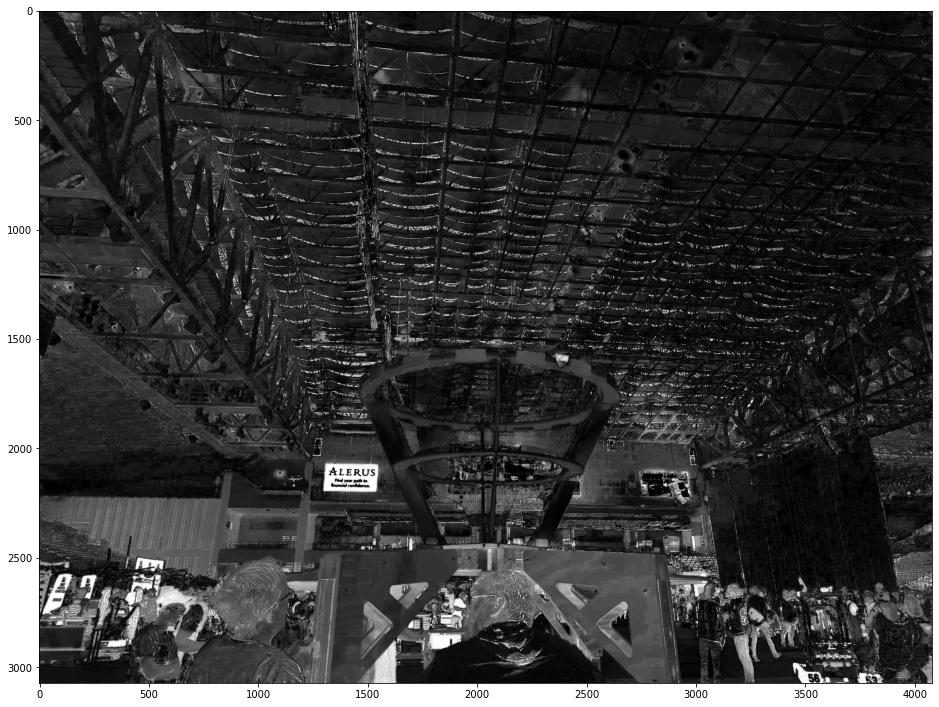

In [ ]:
show(hsv[:,:,1])

Using gray cmap


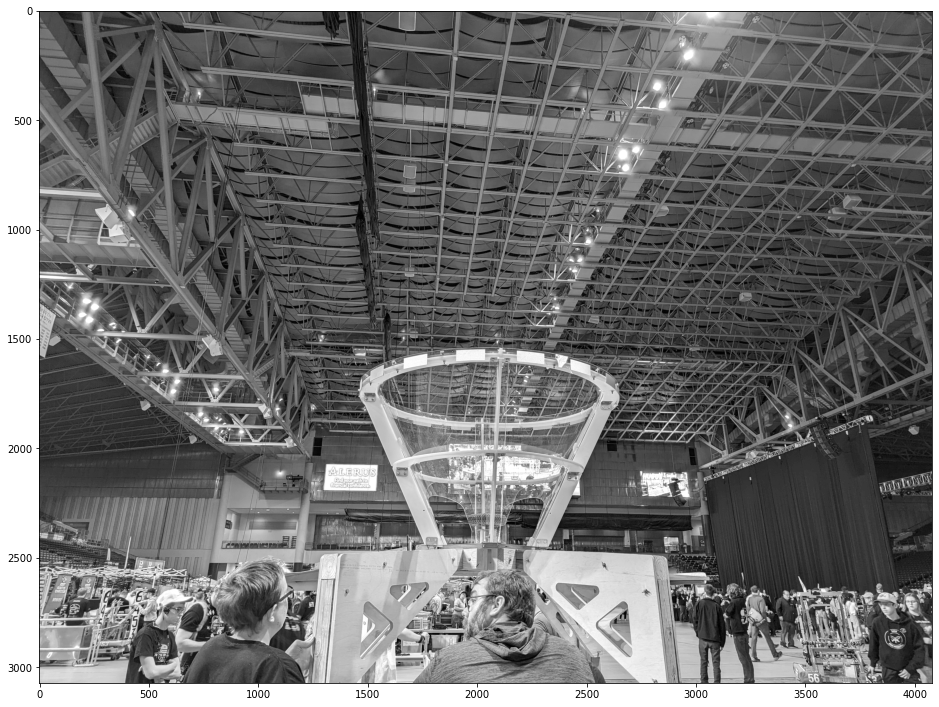

In [ ]:
show(hsv[:,:,2])

# Image Filtering
Image filtering takes an image and applies filtering of various types to it. For example we can blur an image, sharpen* an image, look for edges, and many other operations.

Using gray cmap


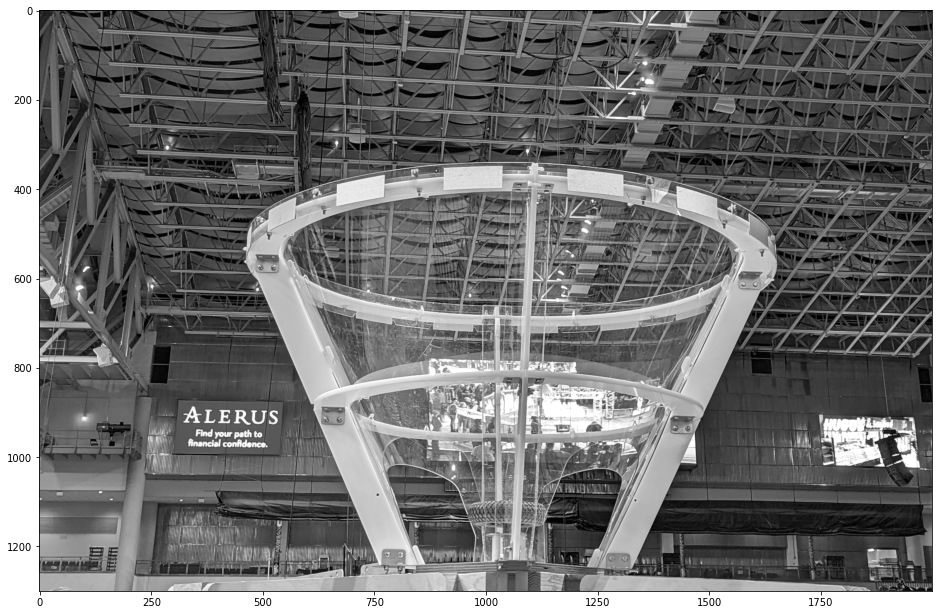

In [ ]:
img = cv.imread('img6.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hoop = gray[1200:2500, 1000:3000]
show(hoop)

Using gray cmap


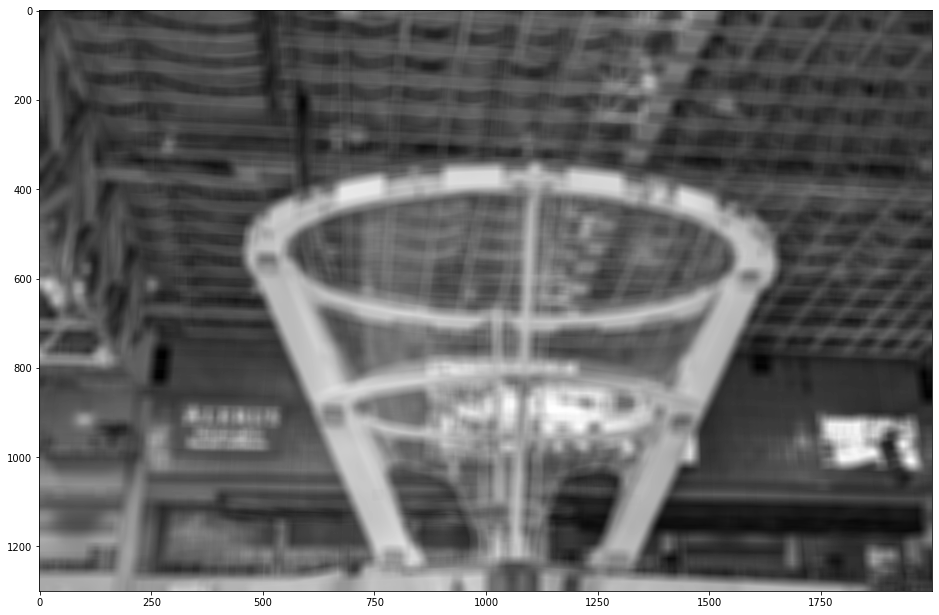

In [ ]:
blur = cv.blur(hoop, (25, 25))
show(blur)

Using gray cmap


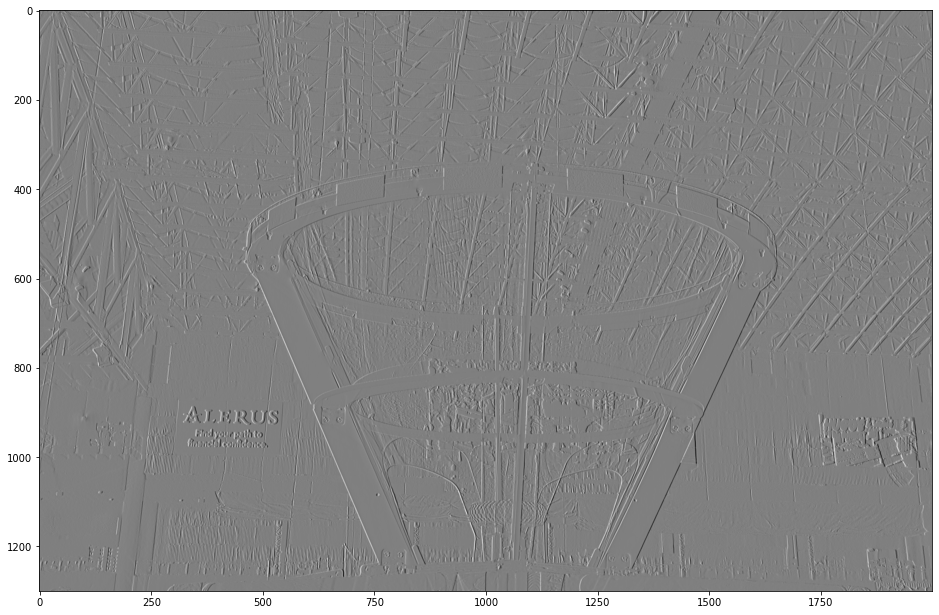

In [ ]:
sobel = cv.Sobel(hoop, cv.CV_32F, 1, 0)
show(sobel)

Using gray cmap


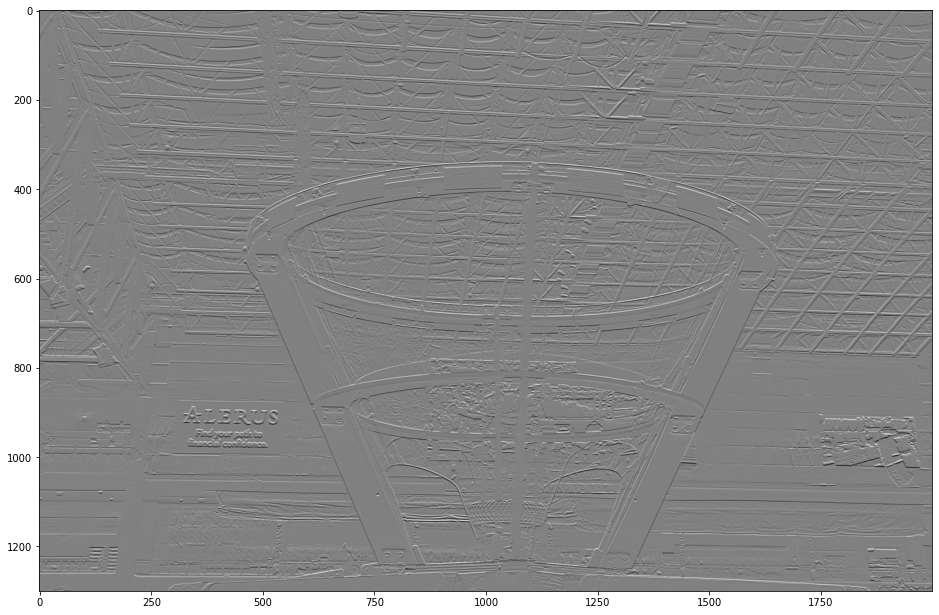

In [ ]:
sobel = cv.Sobel(hoop, cv.CV_32F, 0, 1)
show(sobel)

Using gray cmap


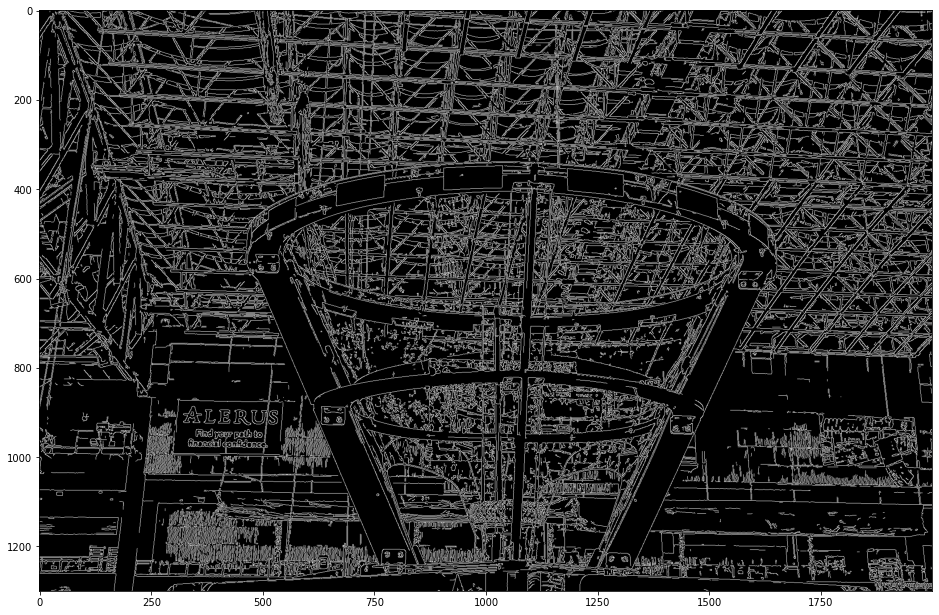

In [ ]:
canny = cv.Canny(hoop, 100, 200)
show(canny)

# Morphological Operations
Morphology is a broad set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

Using gray cmap


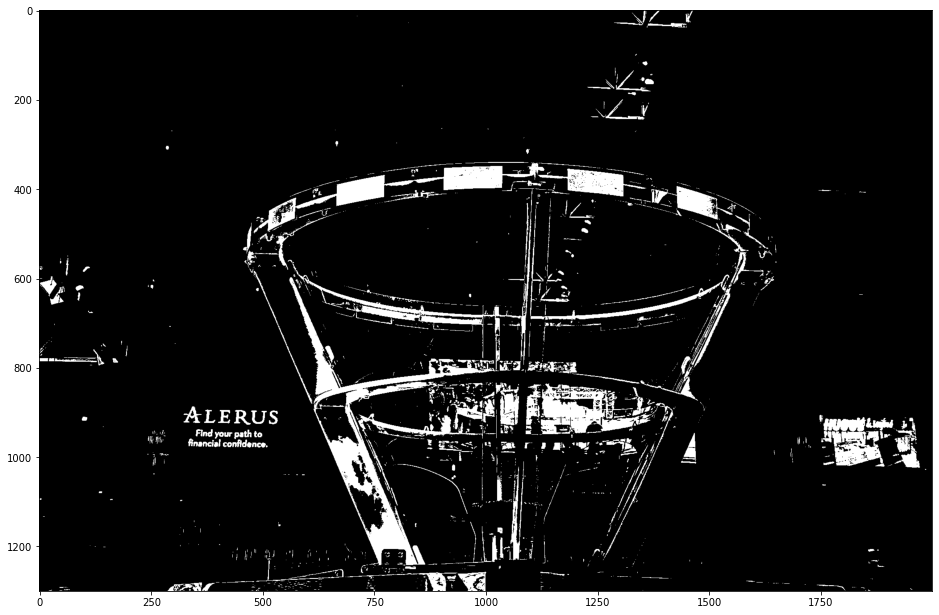

In [ ]:
thres = cv.threshold(hoop, 200, 255, cv.THRESH_BINARY)
thres_img = thres[1]
show(thres_img)

Using gray cmap


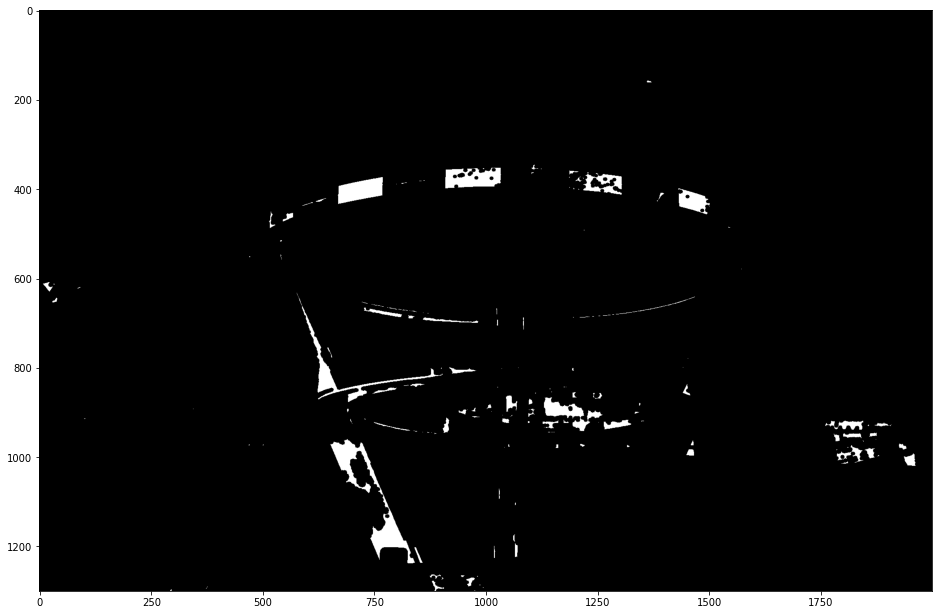

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (9, 9))
erode = cv.erode(thres_img, kernel)
show(erode)

Using gray cmap


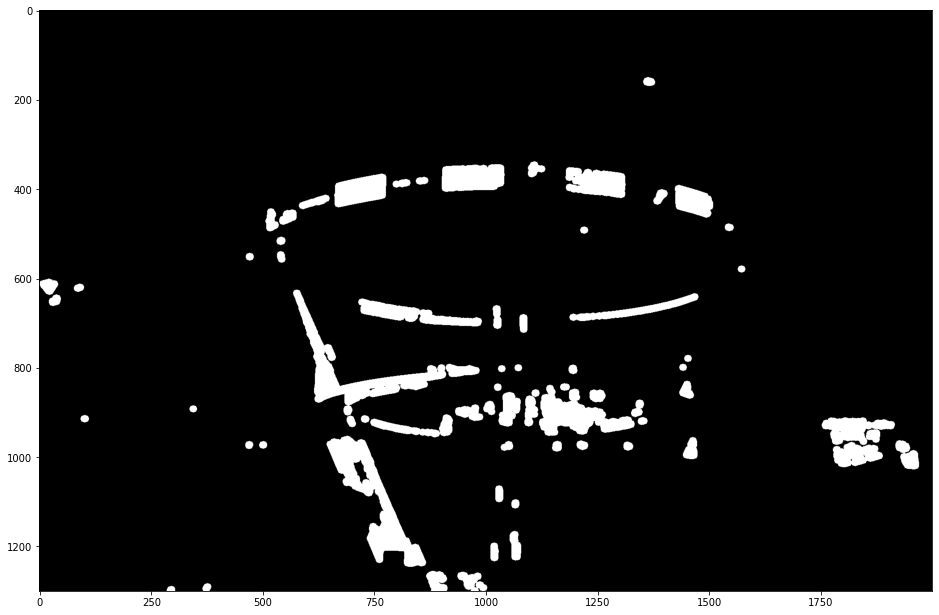

In [ ]:
dilate = cv.dilate(erode, kernel, iterations=2)
show(dilate)

# Contours
What if we want to create a descriptor for a shape? Up to this point we are dealing with raw pixels. 

But we can create an understanding of the objects in the scene. This is where contours come in.

Color image


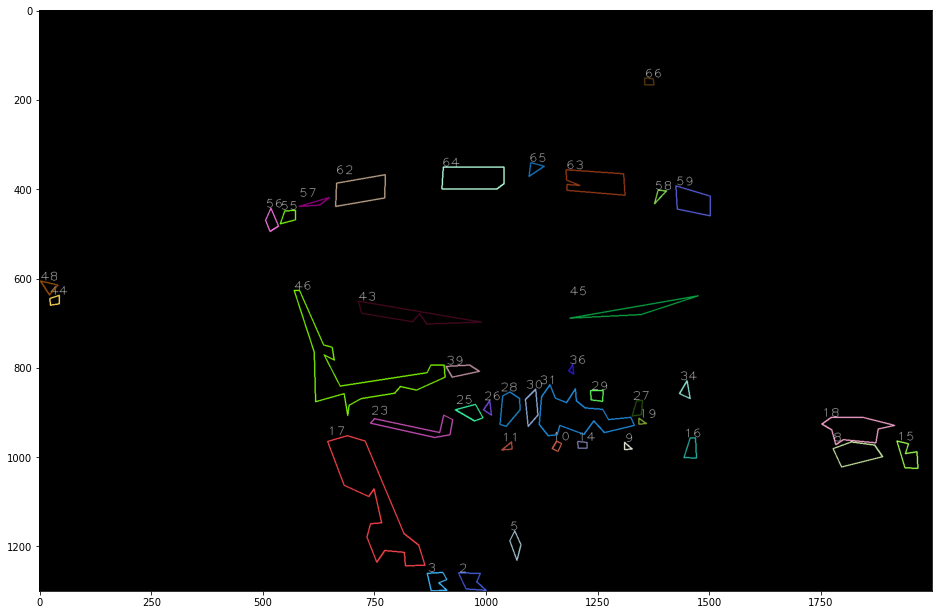

In [ ]:
contours, hier = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Draw contours
drawing = np.zeros((thres_img.shape[0], thres_img.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):    
    simple = cv.approxPolyDP(contours[i], 10, True)
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    rect = cv.boundingRect(simple)
    area = cv.contourArea(simple)
    # Filter contours with a minimum area
    if area > 15:
        cv.drawContours(drawing, [simple], 0, color, 2, cv.LINE_8, hier, 0)
        cv.putText(drawing, f'{i}', (rect[0], rect[1]), cv.FONT_HERSHEY_PLAIN, 2, (255, 255, 255))
        
show(drawing)

# Vision Targets
The Vision targets are 5 inches wide and 2 inches high. So they they have an aspect ratio of 5/2 or 2.5
Now that we have contours, go through the contours and find a rectange with a roughly 2.5 aspect ratio

Count: 5: Area: 802.5 Aspect: 2.5769230769230766 (1054, 1165, 26, 67)
Count: 18: Area: 5947.5 Aspect: 2.6451612903225805 (1753, 911, 164, 62)
Count: 23: Area: 2832.5 Aspect: 3.627450980392157 (742, 906, 185, 51)
Count: 30: Area: 1459.5 Aspect: 2.896551724137931 (1089, 848, 29, 84)
Count: 39: Area: 1227.0 Aspect: 2.7142857142857144 (911, 794, 76, 28)
Count: 57: Area: 358.0 Aspect: 3.2857142857142856 (582, 419, 69, 21)
Count: 63: Area: 5911.0 Aspect: 2.293103448275862 (1180, 357, 133, 58)
Count: 64: Area: 6641.5 Aspect: 2.8 (902, 351, 140, 50)
Color image


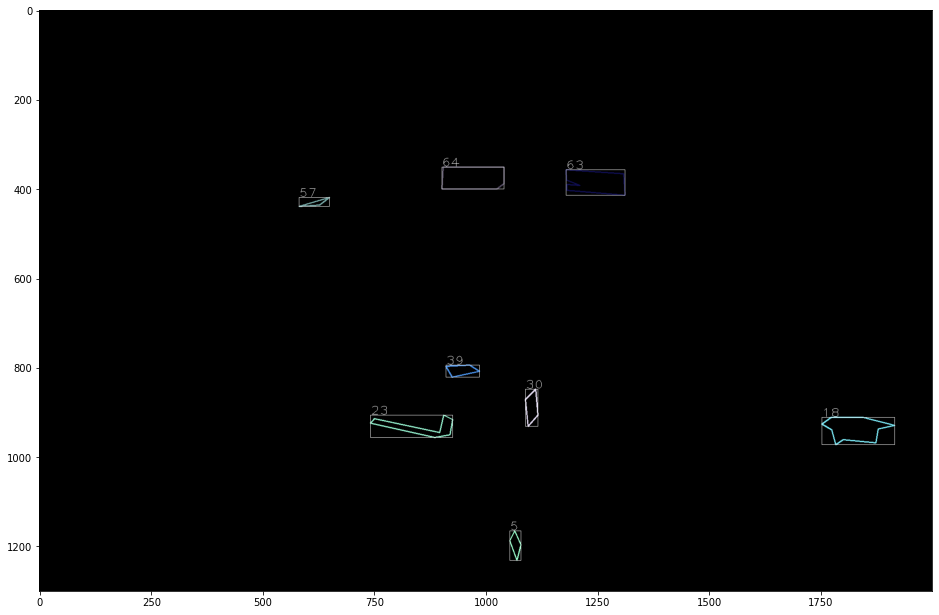

In [ ]:
contours, hier = cv.findContours(dilate, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Draw contours
drawing = np.zeros((thres_img.shape[0], thres_img.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):    
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    simple = cv.approxPolyDP(contours[i], 10, True)
    rect = cv.boundingRect(simple)
    area = cv.contourArea(simple)
    if area > 15:
        if rect[2] > 0:
            aspect = rect[2]/rect[3]
            if aspect < 1:
                aspect = 1/aspect

            if (aspect > 2) and (aspect < 4):
                cv.drawContours(drawing, [simple], 0, color, 2, cv.LINE_8, hier, 0)
                cv.rectangle(drawing, rect, (255, 255, 255))
                cv.putText(drawing, f'{i}', (rect[0], rect[1]), cv.FONT_HERSHEY_PLAIN, 2, (255, 255, 255))
                mu = cv.moments(rect)
                hu = cv.HuMoments(mu)
                print(f'Count: {i}: Area: {cv.contourArea(simple)} Aspect: {aspect} {rect}')
show(drawing)


# Determine the distance to an object
We know those reflectors are 5 inches wide. Contour 64 is the middle one and is 140 pixels wide. My phone takes pictures with a resolution of 4080x3072 and has a 82 degree field of view.

tan(degrees) = 5 inches / distance
or
distance = 5 inches / tan(degrees)

In [ ]:
fov_of_tape = 140/4080 * 82
print(f'The tape occupies {fov_of_tape:4.2} degrees')


The tape occupies  2.8 degrees


In [ ]:
d = 5 / np.tan(2.8*np.pi/180)
print(f'The tape is {d:2.4} inches away')

The tape is 102.2 inches away


# Frequency Analysis
You can look at an image in the frequency domain. This can show periodic patterns in the images

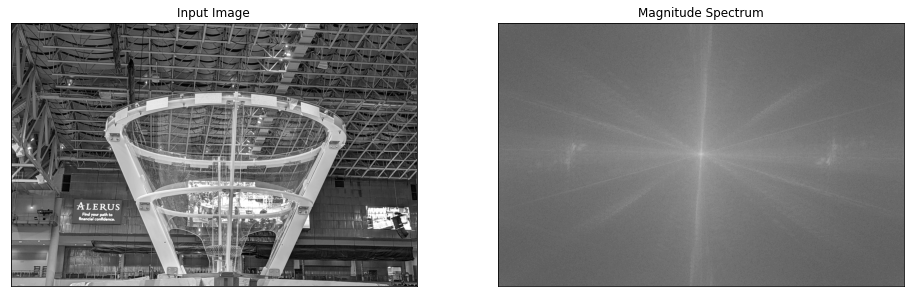

In [ ]:
f = np.fft.fft2(hoop)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(hoop, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/tmp/ipykernel_21664/1449338518.py:3: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


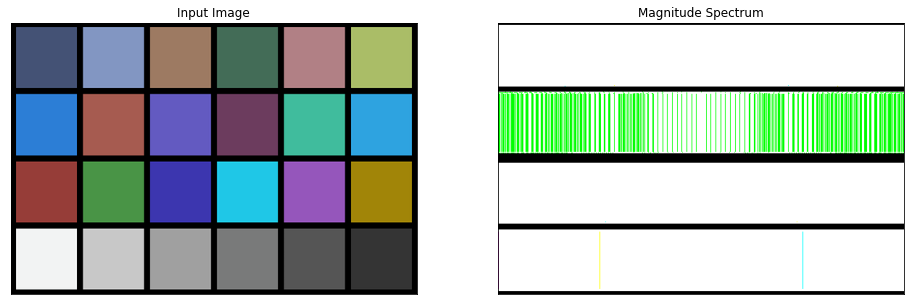

In [ ]:

f = np.fft.fft2(mcbeth)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(mcbeth, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Stereo Cameras    
With multiple cameras you can calibrate them and calculate a disparity map. Basically the difference between pixels on each camera, which can be used to determine distance to each pixel.


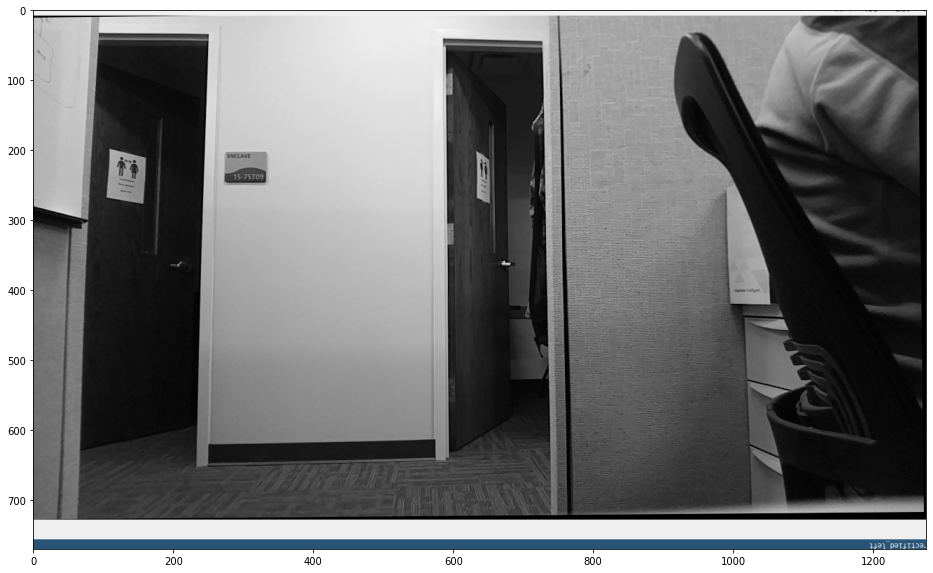

In [17]:
img = cv.imread('oak_gray.jpg')
showbgr(img)

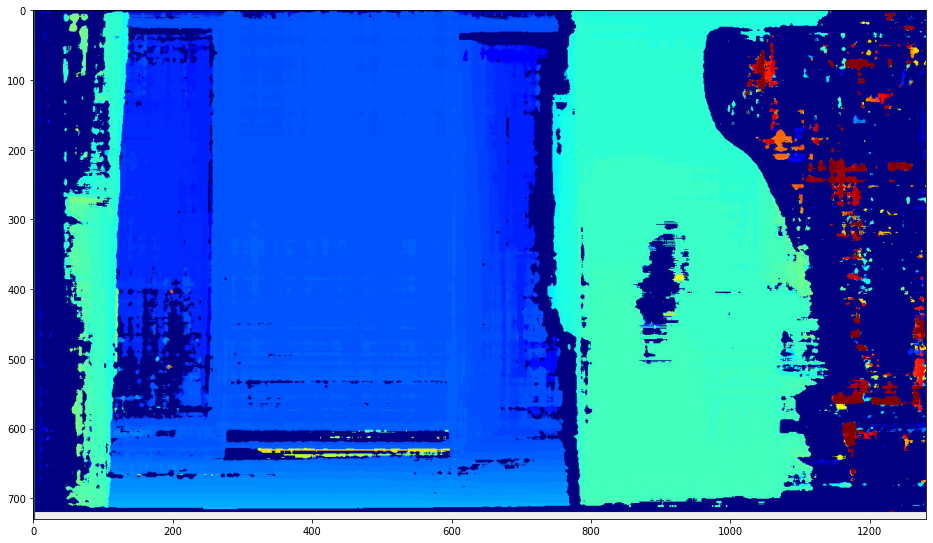

In [20]:
img = cv.imread('oak_depth_map.jpg')
showbgr(img)

# AI/Machine Learning/Deep Neural Networks/Buzz word of the day
Traditional computer vision was the bees knees throughout the 60s and 70s. Multilevel Perceptron (MLP) were invented back in the 1961. But computer horsepower was limited back there and didn't see much use until the 1980s. In the 1980's there was a resergence in AI as MLPs become trainable. But there was a limit. MLPs sufferred from many problems, like the vanishing gradient problem among others. Ultimetly the Support Vector Machine (SVM) prooved to be just as good as an MLP with much lower computational complexity. 

This all changed in 2012 with AlexNet. It was the first deep neural network. 

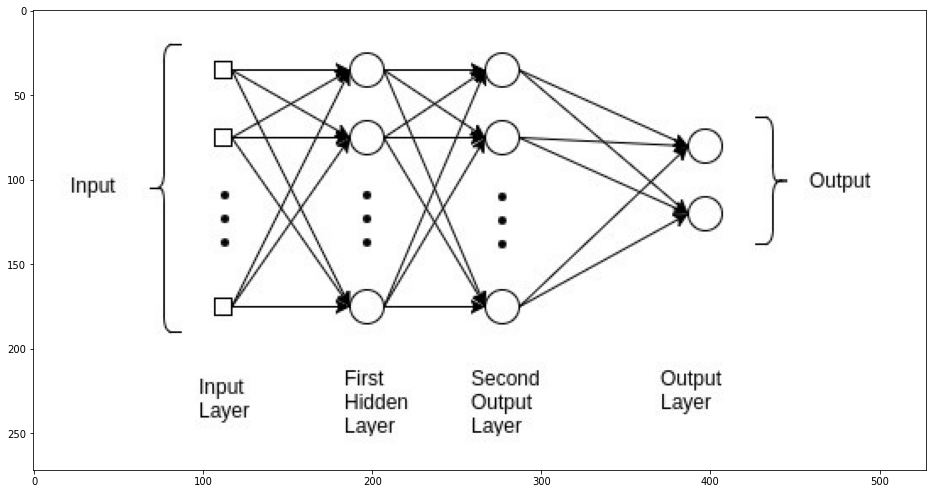

In [10]:
img = cv.imread('mlp.jpg')
showbgr(img)

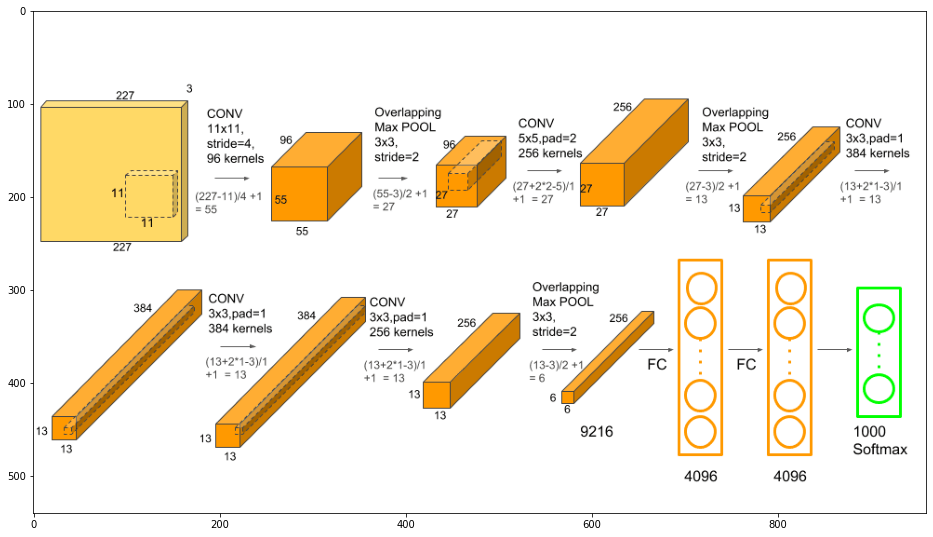

In [11]:
img = cv.imread('AlexNet-1.png')
showbgr(img)

# Yolo
You Only Look Once is a series of really powerful object detectors. The original author left the field as he was afraid of the ramifications of his research. The mantel has been picked up by others. 
Yolov5 Medium has 21.2 million parameters and requires 49 billion FLOPS
[Yolov5 Ball Detector](https://www.youtube.com/watch?v=GWZr60FpqBc)

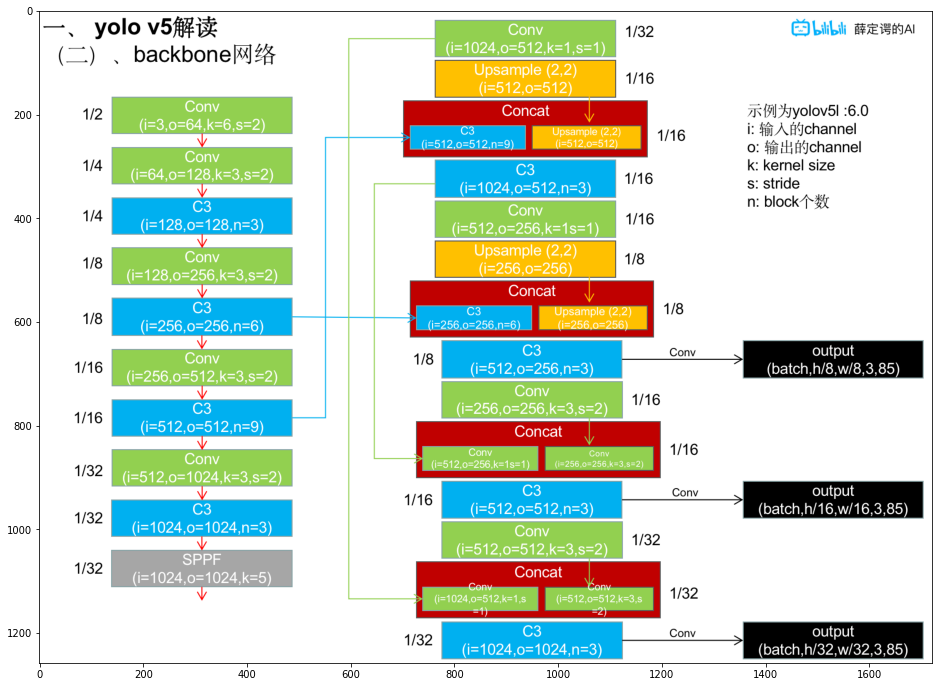

In [13]:
img = cv.imread('yolov5.png')
showbgr(img)

# Billions of other things
Computer vision is an extremely deep and complex topic. Some import things I didn't cover:
1. Camera Calibration
2. Feature extraction and tracking
3. Motion estimation
4. Kalman tracking
5. HuMoments
6. Structured light
7. Superresolution
8. Image stitching